In [1]:
using Pkg
Pkg.activate(".")
import PowerModels as PM
import MathOptInterface as MOI
import JSON 
import Glob
using LinearAlgebra: cond
using Plots
const SOLVED_STATUSES = [MOI.OPTIMAL, MOI.LOCALLY_SOLVED, MOI.ALMOST_OPTIMAL, MOI.ALMOST_LOCALLY_SOLVED]
include("flat_start_NR.jl")

  Activating project at `~/Documents/Projects/pfdelta/data_generation/cpf_data`


flat_start_NR! (generic function with 1 method)

In [2]:
solved_cases_path = "../my_results/2025-04-28_11-28-43/case14_n/close2inf_test/around_nose" # will need to fix path here
sample_num = 241
files = Glob.glob("sample_$(sample_num)_*.json", solved_cases_path)

# Initialize arrays
results = Dict{Float64, Tuple{Float64, Float64}}()

Dict{Float64, Tuple{Float64, Float64}}()

In [ ]:
for file in files
    json_dict = JSON.parsefile(file) # it's not going to be the whole json file
    lam = json_dict["lambda"]
    net = json_dict["solved_net"]

    # Build Jacobian and get condition number
    net = PM.make_basic_network(net)
    J = PM.calc_basic_jacobian_matrix(net)

    # Try to solve NR from a flat start
    pf_solution = PM.compute_ac_pf(net; flat_start=true)
    converged =  pf_solution["termination_status"] in SOLVED_STATUSES

    # TODO: check that solutions match if NR converges
    
    # Save results
    results[lam] = (cond(Array(J), 2), converged)
end

[info | PowerModels]: updated generator 4 cost function with order 0 to a function of order 3: [0.0, 0.0, 0.0]
[info | PowerModels]: updated generator 1 cost function with order 2 to a function of order 3: [0.0, 792.0951, 0.0]
[info | PowerModels]: updated generator 5 cost function with order 0 to a function of order 3: [0.0, 0.0, 0.0]
[info | PowerModels]: updated generator 2 cost function with order 0 to a function of order 3: [0.0, 0.0, 0.0]
[info | PowerModels]: updated generator 3 cost function with order 2 to a function of order 3: [0.0, 2326.9494, 0.0]
[info | PowerModels]: updated generator 4 cost function with order 0 to a function of order 3: [0.0, 0.0, 0.0]
[info | PowerModels]: updated generator 1 cost function with order 2 to a function of order 3: [0.0, 792.0951, 0.0]
[info | PowerModels]: updated generator 5 cost function with order 0 to a function of order 3: [0.0, 0.0, 0.0]
[info | PowerModels]: updated generator 2 cost function with order 0 to a function of order 3: [

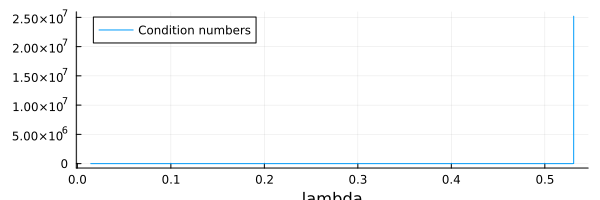

In [9]:
# Plot results
lams = sort(collect(keys(results)))
vals = [results[k] for k in lams]

cond_nums = first.(vals)
convergence = last.(vals)

p1 = plot(lams[1:end], cond_nums[1:end], label="Condition numbers", xlabel="lambda")
# p2 = bar(lams, convergence, label="NR convergence from flat start", xlabel="lambda")

plot(p1, size = (600, 200))
# plot(p1, p2, layout = (2,1), size = (600, 600))